In [1]:
import numpy as np
import pandas as pd
import polars as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, rand_score, adjusted_rand_score
import altair as alt
import seaborn as sns

In [2]:
%%time
# Load the dataset polars
pl_df = pl.read_csv('Data-Mushroom/mushrooms.csv', skip_rows=2)
pl_df.head()

CPU times: user 5.23 ms, sys: 3.78 ms, total: 9.01 ms
Wall time: 3.12 ms


class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""p""","""x""","""s""","""n""","""t""","""p""","""f""","""c""","""n""","""k""","""e""","""e""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""k""","""s""","""u"""
"""e""","""x""","""s""","""y""","""t""","""a""","""f""","""c""","""b""","""k""","""e""","""c""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""n""","""n""","""g"""
"""e""","""b""","""s""","""w""","""t""","""l""","""f""","""c""","""b""","""n""","""e""","""c""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""n""","""n""","""m"""
"""p""","""x""","""y""","""w""","""t""","""p""","""f""","""c""","""n""","""n""","""e""","""e""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""p""","""k""","""s""","""u"""
"""e""","""x""","""s""","""g""","""f""","""n""","""f""","""w""","""b""","""k""","""t""","""e""","""s""","""s""","""w""","""w""","""p""","""w""","""o""","""e""","""n""","""a""","""g"""


In [3]:
%%time
pd_df = pd.read_csv('Data-Mushroom/mushrooms.csv',header=1)
pd_df.head()

CPU times: user 6.04 ms, sys: 1.39 ms, total: 7.43 ms
Wall time: 6.87 ms


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
pl_y = pl_df.select('class')
pl_x = pl_df.drop('class')
pd_y = pd_df[['class']]
pd_x = pd_df.drop('class', axis=1)

In [5]:
pl_encoder = preprocessing.LabelEncoder()
pd_encoder = preprocessing.LabelEncoder()

In [6]:
%%time
pl_x = pl_x.select(
    [
        pl.all().map_batches(pl_encoder.fit_transform)
    ]
)
pl_x.head()

CPU times: user 18.5 ms, sys: 3.88 ms, total: 22.4 ms
Wall time: 16.3 ms


cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [7]:
%%time
pd_x = pd_x.apply(pd_encoder.fit_transform)
pd_x.head()

CPU times: user 11.6 ms, sys: 829 μs, total: 12.5 ms
Wall time: 12 ms


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [8]:
%%time
pl_unique_counts = pl_x.select(pl.all().n_unique())
pl_single_unique_cols = [pl_unique_counts.columns[i]
                       for i, val in enumerate(pl_unique_counts.row(0))
                       if val == 1]
print(f"Removed columns: {pl_single_unique_cols}")
pl_x = pl_x.drop(pl_single_unique_cols)

Removed columns: ['veil-type']
CPU times: user 1.51 ms, sys: 921 μs, total: 2.44 ms
Wall time: 757 μs


In [9]:
%%time
pd_x = pd_x.loc[:,pd_x.nunique()!=1]

CPU times: user 1.66 ms, sys: 770 μs, total: 2.43 ms
Wall time: 1.84 ms


In [10]:
%%time
pl_classifier = KMeans(n_clusters=2)
pl_clusters = pl_classifier.fit_predict(pl_x)

CPU times: user 18.1 ms, sys: 22.9 ms, total: 41 ms
Wall time: 37.1 ms


In [11]:
%%time
pd_classifier = KMeans(n_clusters=2)
pd_clusters = pd_classifier.fit_predict(pd_x)

CPU times: user 12.4 ms, sys: 10.6 ms, total: 23 ms
Wall time: 5.78 ms


In [12]:
pl_yp = pl.DataFrame({
    'predicted-label': pl_clusters
})

In [13]:
counting = pl_yp.select(pl.col('predicted-label').value_counts()).unnest('predicted-label')

pie = (alt.Chart(counting).mark_arc()
.encode(
    theta=alt.Theta('count', stack='normalize', type='quantitative'),
    color=alt.Color('predicted-label', type='nominal'),
    tooltip=['predicted-label', 'count:N'],
))

pie

alt.Chart(...)

In [14]:
pd_yp = pd.DataFrame({
    'predicted-label': pd_clusters
})

<Axes: ylabel='count'>

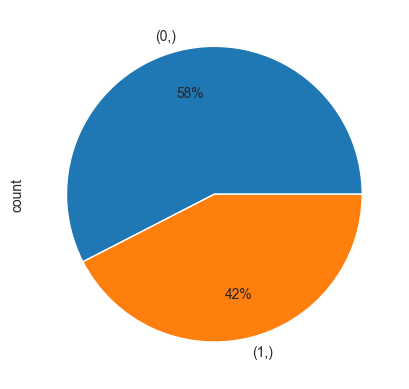

In [15]:
pd_yp.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [16]:
pl_encoded_y = pl_y.select(pl.all().map_batches(pl_encoder.fit_transform))
pd_encoded_y = pd_y.apply(pd_encoder.fit_transform)

## Polars Evaluation

[[0.02363368 0.49433776]
 [0.21467258 0.26735598]]


Text(0.5, 23.52222222222222, 'Predicted Labels')

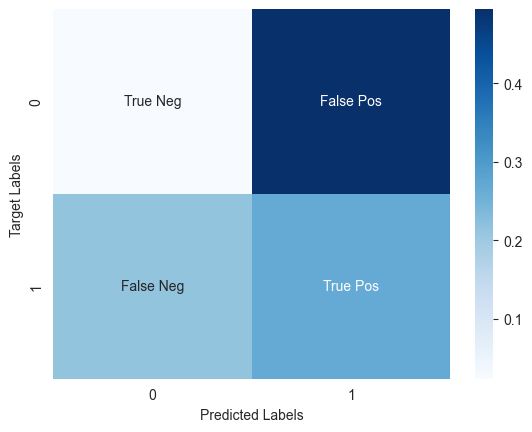

In [17]:
cf_matrix = confusion_matrix(pl_encoded_y, pl_clusters)
print(cf_matrix/np.sum(cf_matrix))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')
ax.set_xlabel('Predicted Labels')

In [18]:
labels = pl.DataFrame({
    'y': pl_y,
    'yp': pl_clusters
})

ri = rand_score(labels.select('y').to_numpy().flatten(), labels.select('yp').to_numpy().flatten())
ari = adjusted_rand_score(pl_y.to_numpy().flatten(), pl_clusters)

print(f'Rand Index: {ri}')
print(f'Adjusted Rand Index: {ari}')

Rand Index: 0.587319846576028
Adjusted Rand Index: 0.17437540308584512


In [19]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 0.29098966026587886
Recall: 0.5546475995914198
Precision: 0.35100193923723333
F1_score: 0.42992874109263657


## Pandas Evaluation

[[0.42442147 0.09354998]
 [0.15115707 0.33087149]]


Text(0.5, 23.52222222222222, 'Predicted Labels')

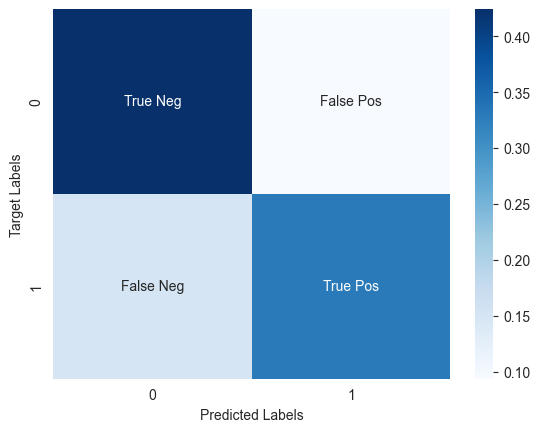

In [20]:
cf_matrix = confusion_matrix(pd_encoded_y, pd_clusters)
print(cf_matrix/np.sum(cf_matrix))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')
ax.set_xlabel('Predicted Labels')

In [21]:
ri = rand_score(pd_y.values.reshape(1, -1)[0], pd_clusters)
ari = adjusted_rand_score(pd_y.values.reshape(1, -1)[0], pd_clusters)

print(f'Rand Index: {ri}')
print(f'Adjusted Rand Index: {ari}')

Rand Index: 0.6303034832556291
Adjusted Rand Index: 0.2605873218513592


In [22]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 0.7552929591334318
Recall: 0.686414708886619
Precision: 0.7795823665893271
F1_score: 0.7300380228136883
